In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [3]:
# Constants
agent_name = "h1"
model_name = "naive"

In [4]:
# All possible features
all_direction_features = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 1, 1],
        [1, 1, 1, 1],
        [0, 0, 0, 2],
        [0, 0, 1, 2],
        [0, 1, 1, 2],
        [1, 1, 1, 2],
        [0, 0, 2, 2],
        [0, 1, 2, 2],
        [1, 1, 2, 2],
        [0, 2, 2, 2],
        [1, 2, 2, 2],
        [2, 2, 2, 2],   
    ]
)
all_own_spot_features  = np.array([0, 1, 2])
all_mode_features      = np.array([0, 1, 2])  

### Evaluating the trained model

In [5]:
trained_model = np.load(f"model_{agent_name}_{model_name}.pt", allow_pickle = True)
policy        = np.argmax(trained_model, axis = -1)

In [6]:
def look_up_q_tensor(f5, f6):
    print(f"Q-Tensor for case f5 = {f5}, f6 = {f6}:")
    print("state  direction features   policy  trained model")
    for i in range(len(all_direction_features)):
        line = f"{i:2}{'':5}{all_direction_features[i]}{'':12}{policy[i, f5, f6]}{'':7}["
        for Q_value in trained_model[i, f5, f6]:
            line += f"{Q_value:-7.3f}"
        line += "]"
        print(line)

In [7]:
look_up_q_tensor(0, 0)

Q-Tensor for case f5 = 0, f6 = 0:
state  direction features   policy  trained model
 0     [0 0 0 0]            4       [  0.000 -0.000 -0.000 -0.000  0.000  0.000]
 1     [0 0 0 1]            4       [  0.000  0.000 -0.000 -0.000  0.000  0.000]
 2     [0 0 1 1]            3       [  0.000  0.000  0.000  0.000  0.000  0.000]
 3     [0 1 1 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 4     [1 1 1 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 5     [0 0 0 2]            4       [ -0.000 -0.000 -0.000 -0.000  0.000 -0.000]
 6     [0 0 1 2]            4       [  0.000  0.000 -0.000 -0.000  0.000  0.000]
 7     [0 1 1 2]            1       [  0.000  0.000  0.000  0.000  0.000  0.000]
 8     [1 1 1 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 9     [0 0 2 2]            2       [  0.000  0.000  0.000  0.000  0.000  0.000]
10     [0 1 2 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
11     [1 1 2 2]         

In [8]:
look_up_q_tensor(1, 0)

Q-Tensor for case f5 = 1, f6 = 0:
state  direction features   policy  trained model
 0     [0 0 0 0]            5       [ -0.006 -0.000 -0.000 -0.016 -0.000 -0.000]
 1     [0 0 0 1]            2       [ -0.000  0.000  1.950  0.002  0.000 -0.000]
 2     [0 0 1 1]            0       [  0.000  0.000 -0.000  0.000  0.000 -0.000]
 3     [0 1 1 1]            3       [  0.000  0.000  0.000  0.000 -0.000  0.000]
 4     [1 1 1 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 5     [0 0 0 2]            3       [  0.017 -0.001  0.218  1.365 -0.000  0.049]
 6     [0 0 1 2]            3       [  0.008 -0.001  0.016  2.492 -0.000  0.040]
 7     [0 1 1 2]            3       [ -0.000  0.000  0.000  2.727  0.003 -0.000]
 8     [1 1 1 2]            3       [  0.000 -0.000  0.000  1.456  0.000 -0.000]
 9     [0 0 2 2]            2       [ -0.000 -0.000  0.381 -0.000 -0.000 -0.000]
10     [0 1 2 2]            2       [ -0.000 -0.000  0.427  0.001  0.000 -0.000]
11     [1 1 2 2]         

In [9]:
look_up_q_tensor(2, 0)

Q-Tensor for case f5 = 2, f6 = 0:
state  direction features   policy  trained model
 0     [0 0 0 0]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 1     [0 0 0 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 2     [0 0 1 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 3     [0 1 1 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 4     [1 1 1 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 5     [0 0 0 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 6     [0 0 1 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 7     [0 1 1 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 8     [1 1 1 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 9     [0 0 2 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
10     [0 1 2 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
11     [1 1 2 2]         

In [10]:
look_up_q_tensor(0, 1)

Q-Tensor for case f5 = 0, f6 = 1:
state  direction features   policy  trained model
 0     [0 0 0 0]            4       [ -0.000 -0.000 -0.000 -0.000  0.000 -0.000]
 1     [0 0 0 1]            4       [ -0.000 -0.000 -0.000 -0.000  0.000 -0.000]
 2     [0 0 1 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 3     [0 1 1 1]            1       [ -0.000  0.001  0.000  0.000  0.000 -0.000]
 4     [1 1 1 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 5     [0 0 0 2]            4       [ -0.000 -0.000 -0.000 -0.000  0.000 -0.000]
 6     [0 0 1 2]            4       [ -0.000 -0.000 -0.000 -0.000  0.000 -0.000]
 7     [0 1 1 2]            1       [ -0.000  0.000 -0.000  0.000  0.000  0.000]
 8     [1 1 1 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 9     [0 0 2 2]            0       [  0.000 -0.000 -0.000 -0.000  0.000 -0.000]
10     [0 1 2 2]            3       [  0.000  0.000  0.000  0.000  0.000  0.000]
11     [1 1 2 2]         

In [11]:
look_up_q_tensor(1, 1)

Q-Tensor for case f5 = 1, f6 = 1:
state  direction features   policy  trained model
 0     [0 0 0 0]            4       [ -0.000 -0.000 -0.000 -0.000  0.017 -0.000]
 1     [0 0 0 1]            3       [ -0.000 -0.000 -0.000  0.120 -0.000 -0.000]
 2     [0 0 1 1]            2       [ -0.000 -0.000  0.047 -0.000 -0.000 -0.001]
 3     [0 1 1 1]            5       [ -0.000 -0.000 -0.000 -0.000 -0.000 -0.000]
 4     [1 1 1 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 5     [0 0 0 2]            4       [  0.411  0.325  0.505  0.424  4.010  0.015]
 6     [0 0 1 2]            2       [  0.001  0.157  3.376  0.133  0.005 -0.000]
 7     [0 1 1 2]            1       [ -0.000  0.174 -0.000 -0.000 -0.000 -0.000]
 8     [1 1 1 2]            2       [ -0.000 -0.000  0.113  0.000 -0.000 -0.000]
 9     [0 0 2 2]            2       [  0.001  0.000  0.977  0.002 -0.000 -0.000]
10     [0 1 2 2]            4       [ -0.000  0.000  0.000  0.000  0.149 -0.000]
11     [1 1 2 2]         

In [12]:
look_up_q_tensor(2, 1)

Q-Tensor for case f5 = 2, f6 = 1:
state  direction features   policy  trained model
 0     [0 0 0 0]            2       [ -0.001 -0.000  0.007 -0.000 -0.000 -0.000]
 1     [0 0 0 1]            3       [  0.050 -0.000  0.052  1.640  0.057 -0.000]
 2     [0 0 1 1]            2       [ -0.000 -0.000  0.176  0.000 -0.000 -0.000]
 3     [0 1 1 1]            2       [ -0.011 -0.000  0.007 -0.000  0.001 -0.001]
 4     [1 1 1 1]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 5     [0 0 0 2]            1       [ -0.000  0.000 -0.000 -0.000 -0.000  0.000]
 6     [0 0 1 2]            3       [ -0.010 -0.003  0.001  0.002 -0.015  0.000]
 7     [0 1 1 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 8     [1 1 1 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
 9     [0 0 2 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
10     [0 1 2 2]            0       [  0.000  0.000  0.000  0.000  0.000  0.000]
11     [1 1 2 2]         

## Looking at the training process

### Training performance over rounds

In [13]:
with open("results_train.json") as file:
    training_results = json.load(file)

In [14]:
number_of_rounds = training_results['by_agent'][f"agent_{agent_name}"]['rounds']

round_list      = list(training_results['by_round'])
rounds          = np.zeros(number_of_rounds)
collected_coins = np.zeros(number_of_rounds)
round_lengths   = np.zeros(number_of_rounds)
for i, round_name in enumerate(round_list):
    round              = training_results['by_round'][round_name]
    collected_coins[i] = round['coins']
    round_lengths[i]   = round['steps']
    rounds[i]          = round['round']

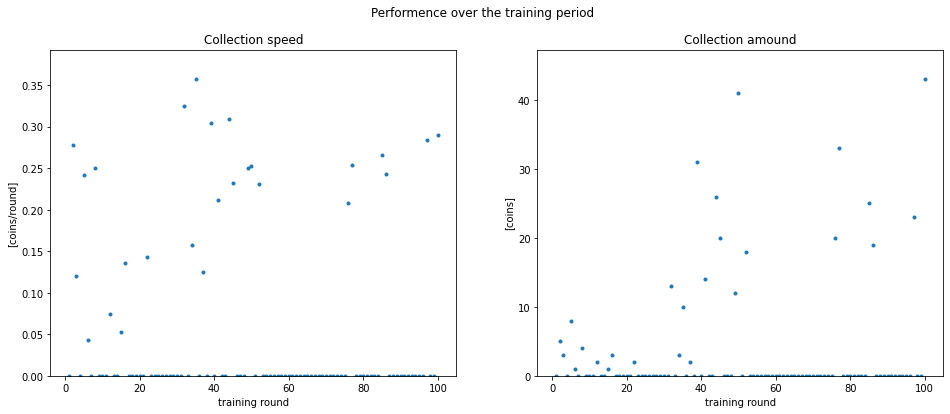

In [15]:
plt.figure(figsize = (16,6))
plt.suptitle("Performence over the training period")
plt.subplot(1, 2, 1)
speed = collected_coins / round_lengths
plt.plot(rounds, speed, '.')
plt.ylim((0, 1.1*max(speed)))
plt.title("Collection speed")
plt.ylabel("[coins/round]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.subplot(1, 2, 2)
plt.plot(rounds, collected_coins, '.')
plt.ylim((0, 1.1*max(collected_coins)))
plt.title("Collection amound")
plt.ylabel("[coins]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")
plt.show()

In [16]:
def analyze_state (state):
    state_index, f5, f6 = state
    Q_state = allQs[:, state]
    labels  = ["action 0", "action 1", "action 2", "action 3", "WAIT", "BOMB"]

    plt.plot(np.arange(number_of_rounds) + 1, Q_state, label = labels)
    plt.title(f"Evolution of state {state}")
    plt.ylabel("Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

### Evolution of the Q-model

In [17]:
allQs = np.load("Qtrain.npy")

for i in range(len(policy)):
    analyze_state(i)

ValueError: x and y must have same first dimension, but have shapes (100,) and (2000, 3, 3, 3, 6)

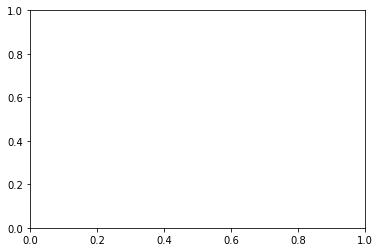

In [18]:
analyze_state((7, 1, 1))

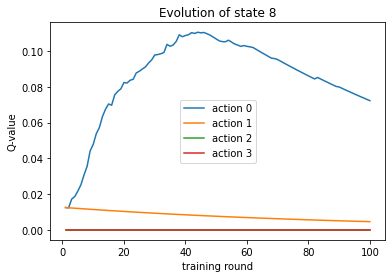

In [13]:
analyze_state(8)

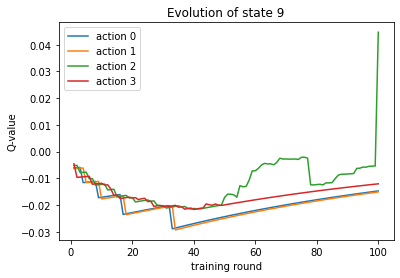

In [14]:
analyze_state(9)

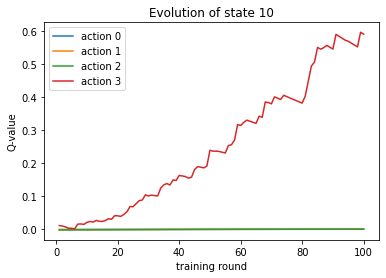

In [15]:
analyze_state(10)

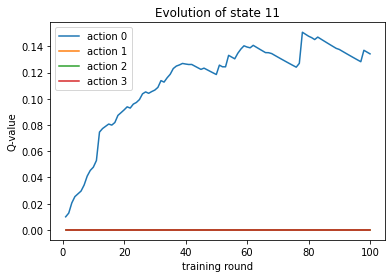

In [16]:
analyze_state(11)